In [1]:
import tensorflow as tf
import urllib
import zipfile
import os
import numpy as np
import pandas as pd
import random
import IPython.display as display
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.vgg16 import preprocess_input
from pathlib import Path
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

In [48]:
train_set= Path('../Last weekly project/Train')

In [49]:
validation_set= Path('../Last weekly project/Validation')

In [50]:
train_class = [str(item.name) for item in train_set.glob('*/') if item.is_dir()]

train_image_paths = [str(item) for item in train_set.glob('*/*') if item.is_file()]
train_image_labels = [str(item.parent.name) for item in train_set.glob('*/*') if item.is_file()]

..\Last weekly project\Train\WATTLED CURASSOW\081.jpg


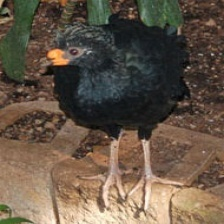


..\Last weekly project\Train\RUFUOS MOTMOT\089.jpg


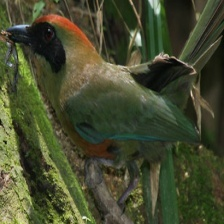


..\Last weekly project\Train\HOODED MERGANSER\057.jpg


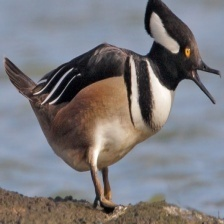

In [51]:
for n in range(3):
    image_path = random.choice(train_image_paths)
    print(image_path)
    display.display(display.Image(image_path))
    print()

In [52]:
label_names = sorted(item.name for item in train_set.glob('*/') if item.is_dir())
label_names

['AFRICAN FIREFINCH',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'ANHINGA',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ARARIPE MANAKIN',
 'ASIAN CRESTED IBIS',
 'BALD EAGLE',
 'BALI STARLING',
 'BALTIMORE ORIOLE',
 'BANANAQUIT',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN SWALLOW',
 'BARRED PUFFBIRD',
 'BAY-BREASTED WARBLER',
 'BEARDED BARBET',
 'BELTED KINGFISHER',
 'BIRD OF PARADISE',
 'BLACK FRANCOLIN',
 'BLACK SKIMMER',
 'BLACK SWAN',
 'BLACK THROATED WARBLER',
 'BLACK VULTURE',
 'BLACK-CAPPED CHICKADEE',
 'BLACK-NECKED GREBE',
 'BLACK-THROATED SPARROW',
 'BLACKBURNIAM WARBLER',
 'BLUE GROUSE',
 'BLUE HERON',
 'BOBOLINK',
 'BROWN NOODY',
 'BROWN THRASHER',
 'CACTUS WREN',
 'CALIFORNIA CONDOR',
 'CALIFORNIA GULL',
 'CALIFORNIA QUAIL',
 'CANARY',
 'CAPE MAY WARBLER',
 'CAPUCHINBIRD',
 'CARMINE BEE-EATER',
 'CASPIAN TERN',
 'CASSOWARY',
 'CHARA DE COLLAR'

In [53]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'AFRICAN FIREFINCH': 0,
 'ALBATROSS': 1,
 'ALEXANDRINE PARAKEET': 2,
 'AMERICAN AVOCET': 3,
 'AMERICAN BITTERN': 4,
 'AMERICAN COOT': 5,
 'AMERICAN GOLDFINCH': 6,
 'AMERICAN KESTREL': 7,
 'AMERICAN PIPIT': 8,
 'AMERICAN REDSTART': 9,
 'ANHINGA': 10,
 'ANNAS HUMMINGBIRD': 11,
 'ANTBIRD': 12,
 'ARARIPE MANAKIN': 13,
 'ASIAN CRESTED IBIS': 14,
 'BALD EAGLE': 15,
 'BALI STARLING': 16,
 'BALTIMORE ORIOLE': 17,
 'BANANAQUIT': 18,
 'BAR-TAILED GODWIT': 19,
 'BARN OWL': 20,
 'BARN SWALLOW': 21,
 'BARRED PUFFBIRD': 22,
 'BAY-BREASTED WARBLER': 23,
 'BEARDED BARBET': 24,
 'BELTED KINGFISHER': 25,
 'BIRD OF PARADISE': 26,
 'BLACK FRANCOLIN': 27,
 'BLACK SKIMMER': 28,
 'BLACK SWAN': 29,
 'BLACK THROATED WARBLER': 30,
 'BLACK VULTURE': 31,
 'BLACK-CAPPED CHICKADEE': 32,
 'BLACK-NECKED GREBE': 33,
 'BLACK-THROATED SPARROW': 34,
 'BLACKBURNIAM WARBLER': 35,
 'BLUE GROUSE': 36,
 'BLUE HERON': 37,
 'BOBOLINK': 38,
 'BROWN NOODY': 39,
 'BROWN THRASHER': 40,
 'CACTUS WREN': 41,
 'CALIFORNIA CONDOR': 42,

In [54]:
index_to_label = {v: k for k, v in label_to_index.items()}
index_to_label

{0: 'AFRICAN FIREFINCH',
 1: 'ALBATROSS',
 2: 'ALEXANDRINE PARAKEET',
 3: 'AMERICAN AVOCET',
 4: 'AMERICAN BITTERN',
 5: 'AMERICAN COOT',
 6: 'AMERICAN GOLDFINCH',
 7: 'AMERICAN KESTREL',
 8: 'AMERICAN PIPIT',
 9: 'AMERICAN REDSTART',
 10: 'ANHINGA',
 11: 'ANNAS HUMMINGBIRD',
 12: 'ANTBIRD',
 13: 'ARARIPE MANAKIN',
 14: 'ASIAN CRESTED IBIS',
 15: 'BALD EAGLE',
 16: 'BALI STARLING',
 17: 'BALTIMORE ORIOLE',
 18: 'BANANAQUIT',
 19: 'BAR-TAILED GODWIT',
 20: 'BARN OWL',
 21: 'BARN SWALLOW',
 22: 'BARRED PUFFBIRD',
 23: 'BAY-BREASTED WARBLER',
 24: 'BEARDED BARBET',
 25: 'BELTED KINGFISHER',
 26: 'BIRD OF PARADISE',
 27: 'BLACK FRANCOLIN',
 28: 'BLACK SKIMMER',
 29: 'BLACK SWAN',
 30: 'BLACK THROATED WARBLER',
 31: 'BLACK VULTURE',
 32: 'BLACK-CAPPED CHICKADEE',
 33: 'BLACK-NECKED GREBE',
 34: 'BLACK-THROATED SPARROW',
 35: 'BLACKBURNIAM WARBLER',
 36: 'BLUE GROUSE',
 37: 'BLUE HERON',
 38: 'BOBOLINK',
 39: 'BROWN NOODY',
 40: 'BROWN THRASHER',
 41: 'CACTUS WREN',
 42: 'CALIFORNIA CONDOR',

<h1> Prepare Data </h1>

In [7]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   rotation_range=20,
                                   fill_mode= 'nearest',
                                   horizontal_flip=True)

In [8]:
validation_datagen= ImageDataGenerator(preprocessing_function=preprocess_input)

In [9]:
train_gen= train_datagen.flow_from_directory(train_set, 
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical', 
                                            shuffle= True,
                                            seed= 42)

Found 31316 images belonging to 225 classes.


In [10]:
validation_gen= validation_datagen.flow_from_directory(validation_set, 
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical', 
                                            shuffle= False,
                                            seed= 42)

Found 1125 images belonging to 225 classes.


In [11]:
vgg16 = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False)
vgg16.trainable=False 

In [12]:
model= tf.keras.Sequential([
                            vgg16,
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1024, activation='relu'), 
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(1024, activation='relu'), 
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(1024, activation='relu'),
                            tf.keras.layers.Dense(225, activation = 'softmax')])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1

In [14]:
callback= [tf.keras.callbacks.EarlyStopping(patience= 5),
           tf.keras.callbacks.ReduceLROnPlateau(monitor= 'val_loss', min_lr= 1e-5, patience=5)]

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
              loss= 'categorical_crossentropy', 
              metrics= ['accuracy']
             )

In [16]:
history= model.fit(train_gen, 
                   validation_data= validation_gen, 
                   epochs= 40, 
                   callbacks= callback
                          )

Epoch 1/40
979/979 [==============================] - 314s 320ms/step - loss: 4.4000 - accuracy: 0.2028 - val_loss: 1.2425 - val_accuracy: 0.6622
Epoch 2/40
979/979 [==============================] - 300s 306ms/step - loss: 1.7301 - accuracy: 0.5750 - val_loss: 0.6278 - val_accuracy: 0.8249
Epoch 3/40
979/979 [==============================] - 300s 306ms/step - loss: 1.1549 - accuracy: 0.7058 - val_loss: 0.4347 - val_accuracy: 0.8658
Epoch 4/40
979/979 [==============================] - 299s 305ms/step - loss: 0.8879 - accuracy: 0.7688 - val_loss: 0.3913 - val_accuracy: 0.8951
Epoch 5/40
979/979 [==============================] - 300s 307ms/step - loss: 0.7475 - accuracy: 0.8016 - val_loss: 0.2886 - val_accuracy: 0.9209
Epoch 6/40
979/979 [==============================] - 300s 307ms/step - loss: 0.6274 - accuracy: 0.8317 - val_loss: 0.2716 - val_accuracy: 0.9191
Epoch 7/40
979/979 [==============================] - 300s 307ms/step - loss: 0.5611 - accuracy: 0.8475 - val_loss: 0.2731 -

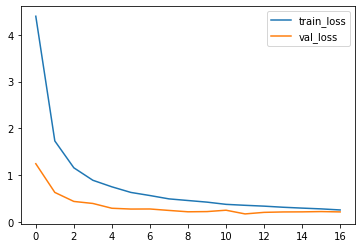

In [26]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

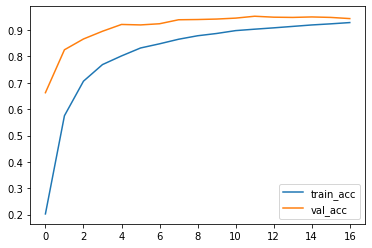

In [25]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [27]:
model.save("hoangnguyen.h5")

In [56]:
test_set= Path('../Last weekly project/Test')

In [64]:
test_datagen= ImageDataGenerator(preprocessing_function=preprocess_input)

In [67]:
test_gen= test_datagen.flow_from_directory(test_set,
                                          target_size=(224,224),
                                          class_mode="categorical")

Found 1125 images belonging to 225 classes.


In [68]:
model.evaluate(test_gen)

36/36 [==============================] - 6s 162ms/step - loss: 0.1754 - accuracy: 0.9627


[0.17543791234493256, 0.9626666903495789]

In [2]:
load_model= tf.keras.models.load_model('hoangnguyen.h5')

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(fn)
  path = '/content/' + fn
  image = load_and_preprocess_image(path)

  reshaped_image = tf.reshape(image, [1,192,192,3])

  prediction = load_model.predict(reshaped_image)

  label_index = tf.math.argmax(prediction[0])

  print("The prediction is", index_to_label[label_index.numpy()])